<a href="https://colab.research.google.com/github/RavelPaniagua/IA-con-Python/blob/main/Red_Neuronal_de_Regresion_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Tensorflow / Pythorch
import pandas as pd
datos = pd.read_csv("celcius.csv")
datos.head()

,celsius,fahrenheit
0,-40,-40.0
1,-10,14.0
2,0,32.0
3,8,46.4
4,15,59.0


In [5]:
X = datos["celsius"].values
y = datos["fahrenheit"].values

In [27]:
X

array([-40, -10,   0,   8,  15,  22,  38])

In [17]:
import tensorflow as tf
modelo = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)), #la entrada los celsius : 1 solo dato
    tf.keras.layers.Dense(units = 1), #la salida. tambien es un solo dato: los grados fahrenheit

])
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(.1),
    loss ="mean_squared_error"
)

In [35]:
entrenamiento = modelo.fit(X,y,epochs=1000) # la epochs es la cantidad de vueltas que va a dar el modelo optimizandose y mejorandose por cada epoca

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step - loss: 7667.6470
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 7277.1450
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 6898.3682
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 6531.5063
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 6176.7344
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 5834.2041
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 5504.0464
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 5186.3682
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 4881.2515
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 4588.7515
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4308.8960
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 4041.6848
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 3787.0894
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 3545.0488
Epoch 15/1000
1/1 ━━━━━━━━━

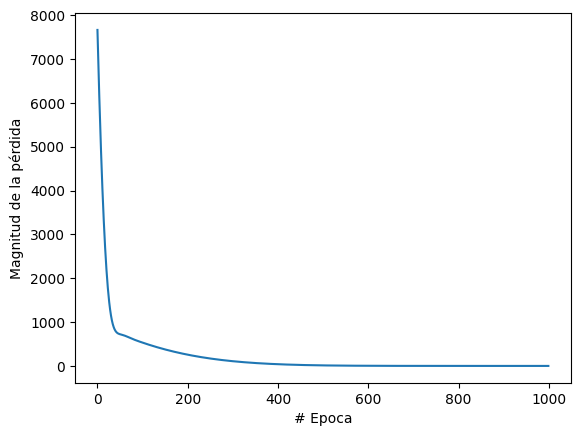

In [36]:
# vamos a graficar el proceso de entrenamiento para ver las medicion de los ajustes
import matplotlib.pyplot as plt

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de la pérdida")
plt.plot(entrenamiento.history["loss"])

In [37]:
# con esto ya estamos listos para hacer nuestras predicciones
import numpy as np
c = 1230
pred = modelo.predict(np.array([[c]]))
print(f"Prediccion: {c} celsius son {pred[0]} fahrengeit")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediccion: 1230 celsius son [2246.5178] fahrengeit


In [38]:
#para poder visualizar las entradas y los cesgos
print(modelo.layers[0].get_weights())

[array([[1.8004644]], dtype=float32), array([31.946444], dtype=float32)]


#dato interesante la formula original para calcular celsius a fahrenheit es
# (C * 1.8) + 32 --> donde el 1.8 lo podemos ver claramente como el modelo llegó a esa misma conclusion aqui array([[1.8004644]]
# y por igual el 32 --> el modelo lo muestra aqui [31.946444]

In [ ]:
# como el modelo llega a esa conclusion - con algo llamado # Backpropagation / propagación hacia atras.